In [1]:
# author Alex J. Yang
import numpy as np
import pandas as pd
import itertools

In [2]:
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('\Allpaper.csv.zip')

In [4]:
df

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,Atyp_Median_Z,Patent_Count,Newsfeed_Count,Tweet_Count,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f
0,2293657740,1907.0,8.900348e+07,20033.897428,96.0,0,0,5866.0,10.0,0.0,...,NaN,2,0,0,185592680.0,Chemistry,1.0,1.0,1.0,640.707242
1,2060429741,1939.0,5.486237e+07,16070.548519,67.0,0,0,5252.0,9.0,0.0,...,NaN,26,0,0,121332964.0,Physics,1.0,1.0,1.0,221.656660
2,2318680928,1945.0,9.546486e+07,13083.868925,62.0,0,0,7034.0,11.0,0.0,...,NaN,3,1,0,39432304.0,Environmental science,1.0,1.0,1.0,303.878846
3,2294798173,1901.0,2.177358e+07,12250.804281,104.0,0,0,6483.0,0.0,0.0,...,NaN,66,0,0,121332964.0,Physics,1.0,1.0,1.0,467.715626
4,2148301044,1927.0,3.006184e+09,10760.096434,78.0,0,0,6283.0,1.0,1.0,...,NaN,2,1,4,86803240.0,Biology,1.0,1.0,1.0,608.147959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406353,2000449275,1986.0,7.326056e+07,-10.674530,5.0,0,1,3221.0,839.0,959.0,...,21.310137,2,0,20,121332964.0,Physics,1.0,1.0,1.0,171.823392
2406354,1488054175,1976.0,1.143504e+08,-10.682465,7.0,0,1,1940.0,353.0,54.0,...,6.119293,0,0,0,86803240.0,Biology,1.0,1.0,1.0,75.885951
2406355,2073618030,1980.0,3.880285e+06,-10.878000,7.0,0,1,1478.0,224.0,38.0,...,3.000000,30,0,10,86803240.0,Biology,1.0,1.0,1.0,55.452941
2406356,2099068279,1974.0,1.187199e+08,-11.251612,7.0,0,1,6188.0,1018.0,4.0,...,NaN,0,0,2,15744967.0,Psychology,1.0,1.0,1.0,282.308855


In [4]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [5]:
def yearGroup(x):
    if x<1920:
        return '1900-1919'
    elif x<1940:
        return '1920-1939'
    elif x<1960:
        return '1940-1959'
    elif x<1980:
        return '1960-1979'
    else:
        return '1980-1999'
    
def delayGroup(x):
    if x<2:
        return x
    elif x<10:
        return '2-9'
    elif x<20:
        return '10-19'
    elif x<50:
        return '20-49'
    else:
        return '>50'
df['yearGroup'] = df['Year'].apply(yearGroup)
df['delayGroup'] = df['SB_T'].apply(delayGroup)

In [6]:
df1= df[(df['type_Concave'] == 0)&(df['type_Immediacy'] == 0)].copy()
df2 = df[df['type_Concave'] == 1].copy()
df3 = df[df['type_Immediacy'] == 1].copy()

In [7]:
def convert_column_to_percentile(df, column_name):
    ranks = df[column_name].rank()
    percentiles = (ranks - 1) / (len(df) - 1) * 100
    df[column_name + '_percentile'] = percentiles
convert_column_to_percentile(df1, 'SB_B')
def BpGroup(x):
    if x<5:
        return 5
    elif x<50:
        return 50
    elif x<95:
        return 95
    else:
        return 100
df1['SB_B_p'] = df1['SB_B_percentile'].apply(BpGroup)

In [8]:
df.head(3)

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,Newsfeed_Count,Tweet_Count,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f,yearGroup,delayGroup
0,2293657740,1907.0,89003483.0,20033.897428,96.0,0,0,5866.0,10.0,0.0,...,0,0,185592680.0,Chemistry,1.0,1.0,1.0,640.707242,1900-1919,>50
1,2060429741,1939.0,54862371.0,16070.548519,67.0,0,0,5252.0,9.0,0.0,...,0,0,121332964.0,Physics,1.0,1.0,1.0,221.656660,1920-1939,>50
2,2318680928,1945.0,95464858.0,13083.868925,62.0,0,0,7034.0,11.0,0.0,...,1,0,39432304.0,Environmental science,1.0,1.0,1.0,303.878846,1940-1959,>50


In [9]:
df1.head(3)

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f,yearGroup,delayGroup,SB_B_percentile,SB_B_p
0,2293657740,1907.0,89003483.0,20033.897428,96.0,0,0,5866.0,10.0,0.0,...,185592680.0,Chemistry,1.0,1.0,1.0,640.707242,1900-1919,>50,100.000000,100
1,2060429741,1939.0,54862371.0,16070.548519,67.0,0,0,5252.0,9.0,0.0,...,121332964.0,Physics,1.0,1.0,1.0,221.656660,1920-1939,>50,99.999949,100
2,2318680928,1945.0,95464858.0,13083.868925,62.0,0,0,7034.0,11.0,0.0,...,39432304.0,Environmental science,1.0,1.0,1.0,303.878846,1940-1959,>50,99.999897,100


In [10]:
df2.head(3)

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,Newsfeed_Count,Tweet_Count,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f,yearGroup,delayGroup
2085780,2142529490,1984.0,203050076.0,-1.387779e-17,3.0,0,1,112.0,92.0,12.0,...,0,0,185592680.0,Chemistry,0.0,1.0,1.0,5.410234,1980-1999,2-9
2085781,1993117519,1984.0,104038378.0,-1.387779e-17,2.0,0,1,81.0,66.0,29.0,...,0,0,86803240.0,Biology,0.0,0.0,1.0,2.594339,1980-1999,2-9
2085782,2024740305,1996.0,67862205.0,-1.387779e-17,2.0,0,1,117.0,85.0,0.0,...,0,0,86803240.0,Biology,0.0,0.0,1.0,2.591313,1980-1999,2-9


In [11]:
df3.head(3)

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,Newsfeed_Count,Tweet_Count,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f,yearGroup,delayGroup
1943203,2028290150,1994.0,3880285.0,0.0,0.0,1,0,153.0,102.0,29.0,...,0,0,86803240.0,Biology,0.0,0.0,1.0,3.580185,1980-1999,0.0
1943204,2107052199,1970.0,59020844.0,0.0,0.0,1,0,52.0,37.0,5.0,...,0,0,192562407.0,Materials science,0.0,0.0,1.0,3.581262,1960-1979,0.0
1943205,2073813455,1979.0,58778951.0,0.0,0.0,1,0,73.0,50.0,11.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1960-1979,0.0


In [12]:
df.columns

Index(['PaperID', 'Year', 'JournalID', 'SB_B', 'SB_T', 'type_Immediacy',
       'type_Concave', 'Citation_Count', 'C10', 'Reference_Count', 'C5',
       'Team_Size', 'Institution_Count', 'Disruption', 'Atyp_10pct_Z',
       'Atyp_Median_Z', 'Patent_Count', 'Newsfeed_Count', 'Tweet_Count',
       'FieldID', 'Fieldname', 'Hit_1pct', 'Hit_5pct', 'Hit_10pct', 'C_f',
       'yearGroup', 'delayGroup'],
      dtype='object')

# Distribution

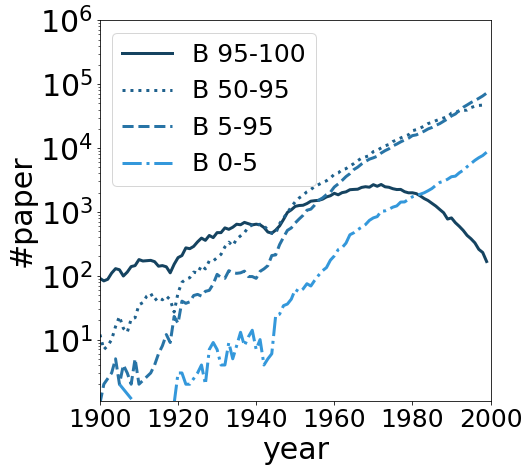

In [22]:
d = pd.DataFrame (df1[df1['SB_B_p']==100].groupby('Year').count()['SB_B'])
d1 = pd.DataFrame(df1[df1['SB_B_p']==95].groupby('Year').count()['SB_B'])
d2 = pd.DataFrame(df1[df1['SB_B_p']==50].groupby('Year').count()['SB_B'])
d3 = pd.DataFrame(df1[df1['SB_B_p']==5].groupby('Year').count()['SB_B'])

f, ax = plt.subplots(figsize=(7, 7))
plt.plot( d.index ,  d.values ,linewidth=3, c = '#154360' ,ls='-', label = 'B 95-100')
plt.plot(d1.index , d1.values ,linewidth=3, c = '#1F618D' ,ls=':', label = 'B 50-95')
plt.plot(d2.index , d2.values ,linewidth=3, c = '#2874A6' ,ls='--', label = 'B 5-95')
plt.plot(d3.index , d3.values ,linewidth=3, c = '#3498DB' ,ls='-.', label = 'B 0-5')
plt.ylim(1.1,1000000)
plt.xlim(1900,2000)
plt.yticks(fontsize=30,)
plt.xticks(fontsize=25,)
plt.xlabel('year',fontsize = 30)
plt.ylabel('#paper',fontsize = 30)
plt.legend(fontsize = 25)
ax.set_yscale("log")
plt.show()

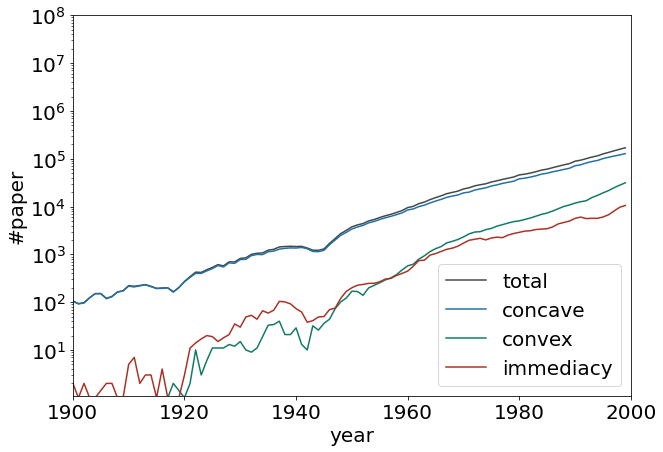

In [27]:
d = pd.DataFrame(df.groupby('Year').count()['SB_B'])
d1 = pd.DataFrame(df1.groupby('Year').count()['SB_B'])
d2 = pd.DataFrame(df2.groupby('Year').count()['SB_B'])
d3 = pd.DataFrame(df3.groupby('Year').count()['SB_B'])

f, ax = plt.subplots(figsize=(10, 7))
plt.plot( d.index ,  d.values , c = '#424949' , label = 'total')
plt.plot(d1.index , d1.values , c = '#2471A3' , label = 'concave')
plt.plot(d2.index , d2.values , c = '#117A65' , label = 'convex')
plt.plot(d3.index , d3.values , c = '#A93226' , label = 'immediacy')
plt.ylim(1.1,100000000)
plt.xlim(1900,2000)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('year',fontsize = 20)
plt.ylabel('#paper',fontsize = 20)
plt.legend(fontsize = 20,loc='lower right')
ax.set_yscale("log")
plt.show()

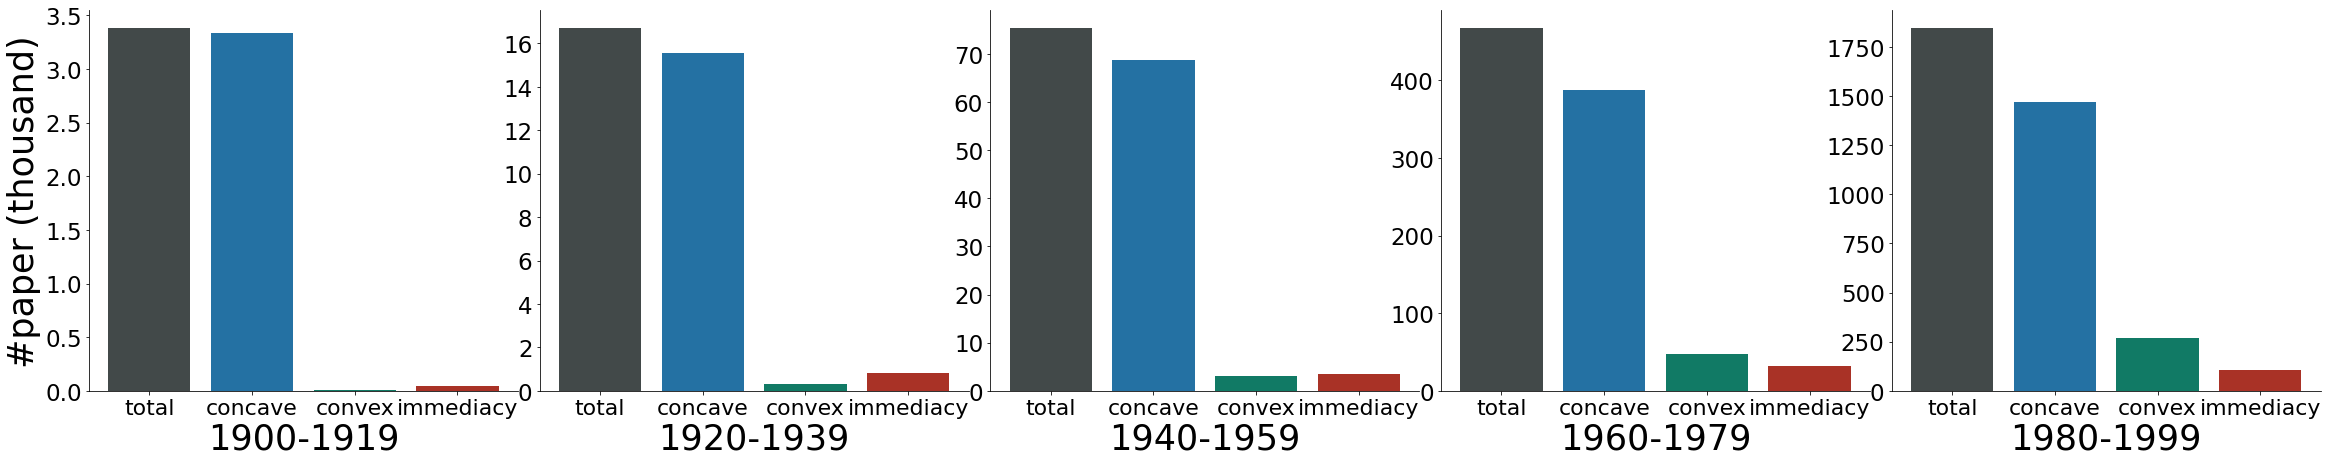

In [33]:
d = pd.DataFrame(  df.groupby('yearGroup').count()['SB_B'])
d1 = pd.DataFrame(df1.groupby('yearGroup').count()['SB_B'])
d2 = pd.DataFrame(df2.groupby('yearGroup').count()['SB_B'])
d3 = pd.DataFrame(df3.groupby('yearGroup').count()['SB_B'])

dd = pd.concat([d,d1,d2,d3],axis = 1)
plt.subplots(1,5,figsize=(40,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.05,hspace=0)
for _ in range(5):
    ax = plt.subplot(1,5, _+1)
    x = [1,2,3,4]
    clst = ['#424949','#2471A3','#117A65','#A93226']*5
    y = dd.iloc[_,:].values/1000
    plt.bar(x,y,color= clst)
    plt.yticks(fontsize=23,)
    plt.xticks(x,['total','concave','convex','immediacy'],fontsize=22,)
    plt.xlabel(dd.index[_],fontsize = 35)
    if _==0:
        plt.ylabel('#paper (thousand)',fontsize = 35)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

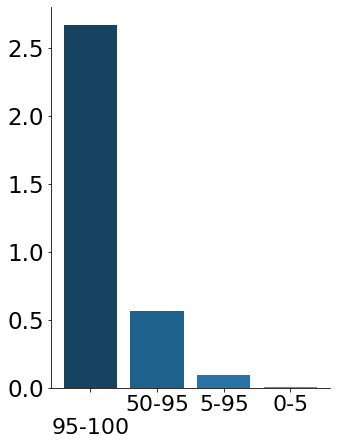

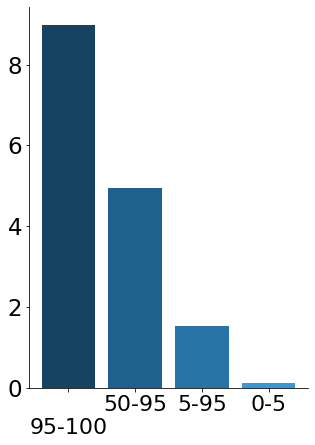

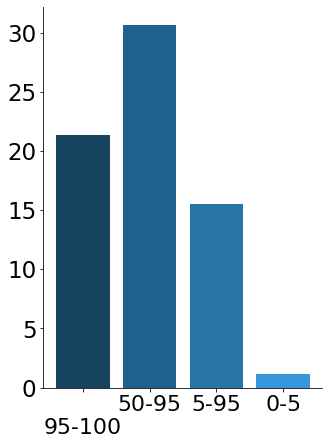

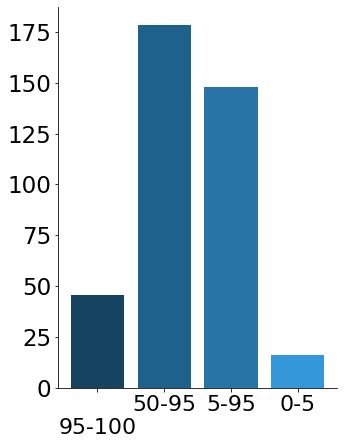

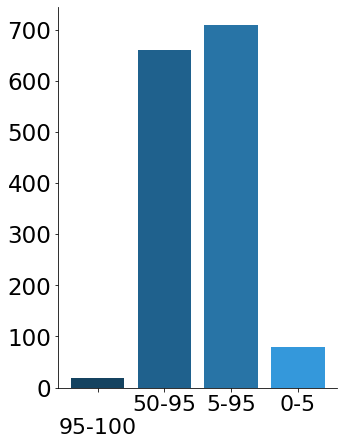

In [39]:
d = pd.DataFrame (df1[df1['SB_B_p']==100].groupby('yearGroup').count()['SB_B'])
d1 = pd.DataFrame(df1[df1['SB_B_p']==95].groupby ('yearGroup').count()['SB_B'])
d2 = pd.DataFrame(df1[df1['SB_B_p']==50].groupby ('yearGroup').count()['SB_B'])
d3 = pd.DataFrame(df1[df1['SB_B_p']==5].groupby  ('yearGroup').count()['SB_B'])

dd = pd.concat([d,d1,d2,d3],axis = 1)
for _ in range(5):
    f, ax = plt.subplots(figsize=(5, 7))
    x = [1,2,3,4]
    clst =  ['#154360','#1F618D','#2874A6','#3498DB']*5
    y = dd.iloc[_,:].values/1000
    plt.bar(x,y,color= clst)
    plt.yticks(fontsize=23,)
    plt.xticks(x,['\n95-100','50-95','5-95','0-5'],fontsize=22,)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

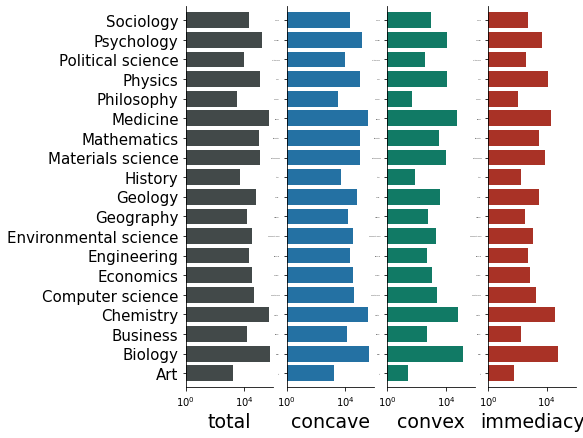

In [15]:
d =  pd.DataFrame (df.groupby('Fieldname').count()['SB_B'])
d1 = pd.DataFrame(df1.groupby('Fieldname').count()['SB_B'])
d2 = pd.DataFrame(df2.groupby('Fieldname').count()['SB_B'])
d3 = pd.DataFrame(df3.groupby('Fieldname').count()['SB_B'])
dlst = [d,d1,d2,d3]
clst = ['#424949','#2471A3','#117A65','#A93226']
labellst = ['total','concave','convex','immediacy']
plt.subplots(1,4,figsize=(7,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0)
for _ in range(4):
    ax = plt.subplot(1,4, _+1)
    plt.barh( dlst[_].index ,  width=np.concatenate(dlst[_].values) , color = clst[_])
    ax.set_xscale("log")
    plt.xlim(1,1000000)
    plt.ylim(-.7,18.7)
    if _>0:
        plt.yticks(fontsize=0,)
    else:
        plt.yticks(fontsize=15,)
    plt.xticks(fontsize=10,)
    plt.xlabel(labellst[_],fontsize = 19)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

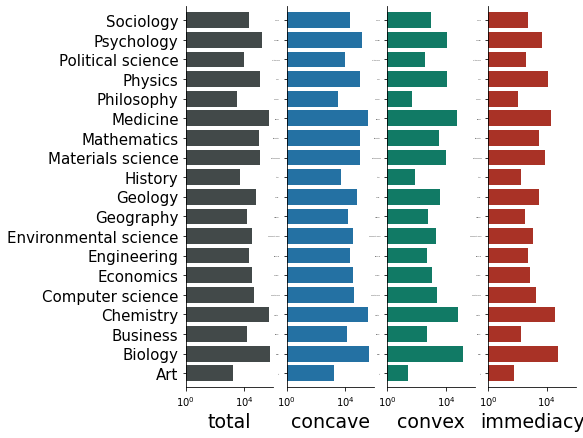

In [12]:
d =  pd.DataFrame (df.groupby('Fieldname').count()['SB_B'])
d1 = pd.DataFrame(df1.groupby('Fieldname').count()['SB_B'])
d2 = pd.DataFrame(df2.groupby('Fieldname').count()['SB_B'])
d3 = pd.DataFrame(df3.groupby('Fieldname').count()['SB_B'])
dlst = [d,d1,d2,d3]
clst = ['#424949','#2471A3','#117A65','#A93226']
labellst = ['total','concave','convex','immediacy']
plt.subplots(1,4,figsize=(7,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0)
for _ in range(4):
    ax = plt.subplot(1,4, _+1)
    plt.barh( dlst[_].index ,  width=np.concatenate(dlst[_].values) , color = clst[_])
    ax.set_xscale("log")
    plt.xlim(1,1000000)
    plt.ylim(-.7,18.7)
    if _>0:
        plt.yticks(fontsize=0,)
    else:
        plt.yticks(fontsize=15,)
    plt.xticks(fontsize=10,)
    plt.xlabel(labellst[_],fontsize = 19)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

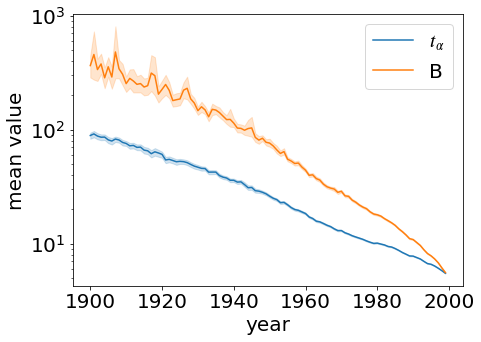

In [16]:
f, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=df, x="Year", y="SB_T",label=r'$𝑡_𝛼$')
sns.lineplot(data=df, x="Year", y="SB_B",label='B')
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('year',fontsize = 20)
plt.ylabel('mean value',fontsize = 20)
ax.set_yscale("log")
plt.legend(fontsize = 20)
plt.show()

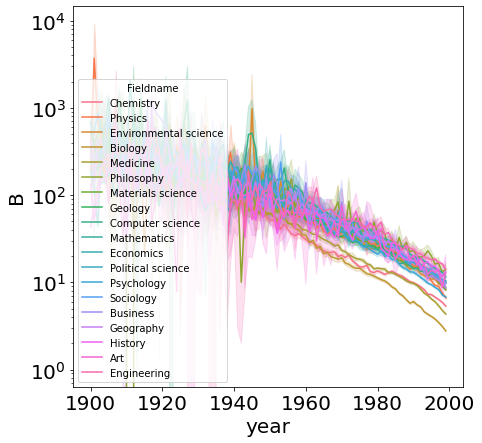

In [17]:
f, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(data=df, x="Year", y="SB_B",hue='Fieldname')
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('year',fontsize = 20)
plt.ylabel('B',fontsize = 20)
ax.set_yscale("log")
plt.show()

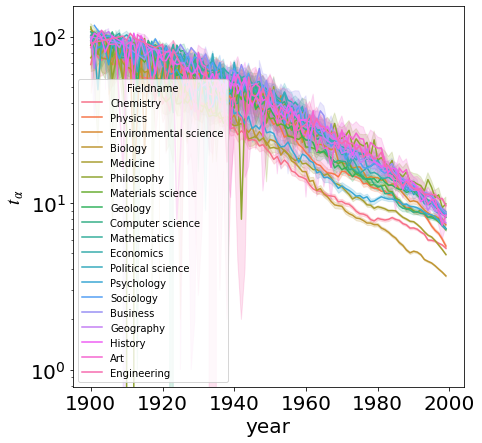

In [18]:
f, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(data=df, x="Year", y="SB_T",hue='Fieldname')
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('year',fontsize = 20)
plt.ylabel(r'$𝑡_𝛼$',fontsize = 20)
ax.set_yscale("log")
plt.show()